In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### Scraping a Table from HTML
Create a parse tree from an HTML using the following packages
* __reqests__ pulls website data from the given URL
* __html.parser__ is used in conjunction w/beautifulsoup in order to create the parse tree
* use the __prettify__ funciton to view the parsed data 

In [3]:
# store url as an onject
url = 'https://en.wikipedia.org/wiki/List_of_capitals_in_the_United_States#State_capitals'
# request url information be retrieved
r = requests.get(url)

# parse data and print using prettify()
us_capitals = BeautifulSoup(r.text, 'html.parser')
print(us_capitals.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of capitals in the United States - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-

Extracting text and other information from the html

In [4]:
# print the title of the webpage
title = us_capitals.title.text
print("Title = ", title)

Title =  List of capitals in the United States - Wikipedia


In [5]:
# find tables within the parse tree
table = us_capitals.find('table', {'class': 'wikitable plainrowheaders sortable'})

# create empty lists to store data
rows = table.find_all('tr')
table_data = []

# Loop through rows and extract data
for row in rows:
    columns = row.find_all(['th', 'td'])
    row_data = [col.text.strip() for col in columns]
    table_data.append(row_data)

# Print the table data
for row in table_data:
    print(row)
else:
    print("Failed to retrieve the Wikipedia page.")

['State', 'Capital', 'Since', 'Area (mi2)', 'Population (2020 US Census)', 'Rank in state(city proper)']
['Proper', 'MSA/µSA', 'CSA']
['Alabama', 'Montgomery', '1846', '159.8', '200,603', '386,047', '476,207', '3']
['Alaska', 'Juneau', '1906', '2716.7', '32,255', '32,255', '', '3']
['Arizona', 'Phoenix', '1912', '517.6', '1,608,139', '4,845,832', '4,899,104', '1']
['Arkansas', 'Little Rock', '1821', '116.2', '202,591', '748,031', '912,604', '1']
['California', 'Sacramento', '1854', '97.9', '524,943', '2,397,382', '2,680,831', '6']
['Colorado', 'Denver', '1867', '153.3', '715,522', '2,963,821', '3,623,560', '1']
['Connecticut', 'Hartford', '1875', '17.3', '121,054', '1,213,531', '1,482,086', '4']
['Delaware', 'Dover', '1777', '22.4', '39,403', '181,851', '7,379,700', '2']
['Florida', 'Tallahassee', '1824', '95.7', '196,169', '384,298', '', '8']
['Georgia', 'Atlanta', '1868', '133.5', '498,715', '6,089,815', '6,930,423', '1']
['Hawaii', 'Honolulu', '1845', '68.4', '350,964', '1,016,508',

In [6]:
# remove second and last rows
table_data.pop(0)
table_data.pop(0)
table_data.pop(-1)

['[24][25][26]']

In [7]:
# display new list of lists
table_data

[['Alabama',
  'Montgomery',
  '1846',
  '159.8',
  '200,603',
  '386,047',
  '476,207',
  '3'],
 ['Alaska', 'Juneau', '1906', '2716.7', '32,255', '32,255', '', '3'],
 ['Arizona',
  'Phoenix',
  '1912',
  '517.6',
  '1,608,139',
  '4,845,832',
  '4,899,104',
  '1'],
 ['Arkansas',
  'Little Rock',
  '1821',
  '116.2',
  '202,591',
  '748,031',
  '912,604',
  '1'],
 ['California',
  'Sacramento',
  '1854',
  '97.9',
  '524,943',
  '2,397,382',
  '2,680,831',
  '6'],
 ['Colorado',
  'Denver',
  '1867',
  '153.3',
  '715,522',
  '2,963,821',
  '3,623,560',
  '1'],
 ['Connecticut',
  'Hartford',
  '1875',
  '17.3',
  '121,054',
  '1,213,531',
  '1,482,086',
  '4'],
 ['Delaware', 'Dover', '1777', '22.4', '39,403', '181,851', '7,379,700', '2'],
 ['Florida', 'Tallahassee', '1824', '95.7', '196,169', '384,298', '', '8'],
 ['Georgia',
  'Atlanta',
  '1868',
  '133.5',
  '498,715',
  '6,089,815',
  '6,930,423',
  '1'],
 ['Hawaii', 'Honolulu', '1845', '68.4', '350,964', '1,016,508', '', '1'],
 ['I

In [8]:
# turn lists of lists into a data frame
capitals_df = pd.DataFrame(table_data, columns = ['State', 'Capital', 'Since', 'Area_mi2', '2020_Population', 'a', 'b', 'c'])

# remove columns with additional unwanted population estimates
columns_to_drop = ['a', 'b', 'c']
capitals_df = capitals_df.drop(columns = columns_to_drop)

# Convert 'Population' and 'Area (sq. mi)' columns to floats
capitals_df['Area_mi2'] = pd.to_numeric(capitals_df['Area_mi2'], errors='coerce')
capitals_df['2020_Population'] = capitals_df['2020_Population'].str.replace(',','').astype(int)

# view data frame
capitals_df.head()

,State,Capital,Since,Area_mi2,2020_Population
0,Alabama,Montgomery,1846,159.8,200603
1,Alaska,Juneau,1906,2716.7,32255
2,Arizona,Phoenix,1912,517.6,1608139
3,Arkansas,Little Rock,1821,116.2,202591
4,California,Sacramento,1854,97.9,524943


In [9]:
type(capitals_df['2020_Population'])

pandas.core.series.Series

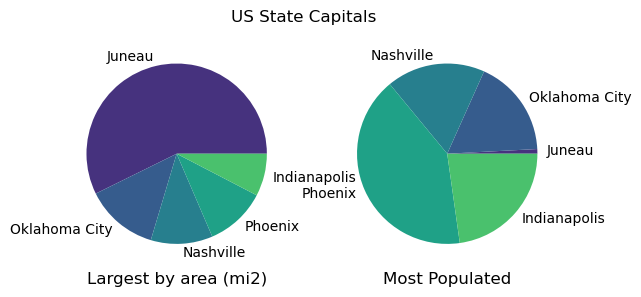

In [10]:
# sort the data by area
capitals_sorted = capitals_df.sort_values(by='Area_mi2', ascending=False)

#chose the 5 largest states
largest_states = capitals_sorted.head(5)

# sort the data by population and choose the 5 largest
capitals_sorted_2 = capitals_df.sort_values(by='Area_mi2', ascending=False)
high_pop_states = capitals_sorted_2.head(5)

# set color palette
sns.set_palette("viridis")

# create a plot
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(largest_states['Area_mi2'], labels=largest_states['Capital'])
ax2.pie(high_pop_states['2020_Population'], labels=high_pop_states['Capital'])

ax1.set_xlabel('Largest by area (mi2)', size=12)
ax2.set_xlabel('Most Populated', size=12)
fig.suptitle('US State Capitals')
plt.subplots_adjust(top=1.25)


## Key Functions within Beautiful Soup

### Creating a parse tree
This is the primary function of Beautiful Soup. Other popular functions within this library are used for navigating, extracting, and/or editing information in the parse tree.
    
``` python
# store and retrieve url
url = 'https://en.wikipedia.org/wiki/'
r = requests.get(url)

# create the parse tree using prettify and an html parser
parse_tree = BeautifulSoup(r.text, 'html.parser')
parse_tree.prettify()
```


### Get the title of a page
``` python
# HTML with a single title
print(parse_tree.title)

# For multiple titles, extract and print all <title> tags
title = parse_tree.title.text
print("The titles are:", title)
```
* the title is extracted using the '<title>' HTML tag

##### Additional HTML Tags
Uses these HTML tags to extract and print certain elements from the parse tree

|  HTML tag  |    Element Type   |
|------------|-------------------|
|    p       | paragraph of text |
| h1, h2, h3 | header levels     |
|    a       | hyperlink         |
|   img      | image             |
| ul         | unordered list    |
| ol         | ordered list      |
|  li        | item within a list|
|  th        | table header      |
|  td        | table data        |


``` python
print(parse_tree.ol) # print an ordered list
print(parse_tree.p) # print a paragraph of text
```



### get attributes of the page:
``` python

```
print(soup.title.name)

#### get text values on the page:
``` python

```
print(soup.title.string)

#### beginning navigation:
``` python

```
print(soup.title.parent.name)

#### getting specific values:
``` python

```
print(soup.p)

#### get anchor tags on the page:
``` python

```

#### get tables from the page:
``` python

```